In [1]:
!pip install -q kaggle
from google . colab import files
files . upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mhammadibrahim","key":"0babc8337473f18808e4c616bab89c32"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d ishantjuyal/emotions-in-text

  0% 0.00/781k [00:00<?, ?B/s]
100% 781k/781k [00:00<00:00, 65.5MB/s]


In [4]:
! unzip /content/emotions-in-text.zip

Archive:  /content/emotions-in-text.zip
  inflating: Emotion_final.csv       


In [5]:
import pandas as pd


#read the dataset with name "Emotion_classify_Data.csv" and store it in a variable df
df = pd.read_csv("Emotion_final.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head()

(21459, 2)


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
#check the distribution of Emotion
df['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

In [8]:
min_samples = 879
df_happy= df[df.Emotion=="happy"].sample(min_samples, random_state=2022)
df_sadness = df[df.Emotion=="sadness"].sample(min_samples, random_state=2022)
df_anger = df[df.Emotion=="anger"].sample(min_samples, random_state=2022)
df_fear  = df[df.Emotion=="fear"].sample(min_samples, random_state=2022)
df_love  = df[df.Emotion=="love"].sample(min_samples, random_state=2022)
df_surprise  = df[df.Emotion=="surprise"].sample(min_samples, random_state=2022)

In [10]:
df_balanced = pd.concat([df_happy,df_sadness,df_anger,df_fear,df_love,df_surprise],axis=0)
df_balanced.Emotion.value_counts()
df_balanced.head()

,Text,Emotion
617,i know shes right because i feel more energeti...,happy
1858,i am very i feel very privileged having said a...,happy
3428,i feel reasonably assured run no magical genea...,happy
14193,i relaxed and nodded feeling assured that some...,happy
13649,i have some vague feeling anyway that it will ...,happy


In [12]:
#Add the new column which gives a unique number to each of these labels 

df_balanced['Emotion_num'] = df_balanced['Emotion'].map({
    'happy' : 0, 
    'sadness': 1, 
    'anger': 2, 
    'fear': 3,
    'love':4,
    'surprise':5
})

#checking the results 
df_balanced.head()

,Text,Emotion,Emotion_num
617,i know shes right because i feel more energeti...,happy,0
1858,i am very i feel very privileged having said a...,happy,0
3428,i feel reasonably assured run no magical genea...,happy,0
14193,i relaxed and nodded feeling assured that some...,happy,0
13649,i have some vague feeling anyway that it will ...,happy,0


**Modelling without Pre-processing Text data**

In [14]:
#Do the 'train-test' splitting with test size of 20%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.Text, 
    df_balanced.Emotion_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.Emotion_num
)

In [15]:
#print the shapes

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4219,)
Shape of X_test:  (1055,)


***Attempt 1 :RandomForest***

In [16]:
#1. create a pipeline object

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_tri_grams', CountVectorizer(ngram_range = (3, 3))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.08      0.13       176
           1       0.29      0.11      0.16       176
           2       0.28      0.05      0.08       175
           3       0.18      0.83      0.30       176
           4       0.36      0.18      0.24       176
           5       0.57      0.09      0.16       176

    accuracy                           0.22      1055
   macro avg       0.34      0.22      0.18      1055
weighted avg       0.34      0.22      0.18      1055



***Attempt 2 :Multinomial Naive Bayes***

In [18]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bigrams', CountVectorizer(ngram_range = (1,3))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.55      0.57       176
           1       0.73      0.50      0.59       176
           2       0.65      0.62      0.64       175
           3       0.63      0.64      0.63       176
           4       0.56      0.81      0.66       176
           5       0.77      0.74      0.76       176

    accuracy                           0.64      1055
   macro avg       0.65      0.64      0.64      1055
weighted avg       0.65      0.64      0.64      1055



***Attempt 3 :RandomForest***

In [19]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bi_grams', CountVectorizer(ngram_range = (1, 2))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       176
           1       0.67      0.78      0.72       176
           2       0.91      0.72      0.80       175
           3       0.81      0.81      0.81       176
           4       0.91      0.93      0.92       176
           5       0.87      0.94      0.90       176

    accuracy                           0.81      1055
   macro avg       0.82      0.81      0.81      1055
weighted avg       0.82      0.81      0.81      1055



**Attempt 4 :RandomForest**
***using TF-IDF vectorizer for pre-processing the text***

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66       176
           1       0.64      0.73      0.68       176
           2       0.87      0.70      0.78       175
           3       0.86      0.76      0.81       176
           4       0.91      0.93      0.92       176
           5       0.86      0.94      0.90       176

    accuracy                           0.79      1055
   macro avg       0.80      0.79      0.79      1055
weighted avg       0.80      0.79      0.79      1055



**Use text pre-processing to remove stop words, punctuations and apply lemmatization**

In [21]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 


#use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [23]:
# create a new column "preprocessed_comment" and use the utility function above to get the clean data
df_balanced['preprocessed_text'] = df_balanced['Text'].apply(preprocess) 

***Build a model with pre processed text***

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_text, 
    df_balanced.Emotion_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.Emotion_num
)

***Attempt1 :RandomForest***

In [25]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bi_grams', CountVectorizer(ngram_range = (1, 2))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       176
           1       0.75      0.72      0.74       176
           2       0.89      0.76      0.82       175
           3       0.88      0.77      0.82       176
           4       0.82      0.93      0.87       176
           5       0.80      0.95      0.87       176

    accuracy                           0.81      1055
   macro avg       0.81      0.81      0.81      1055
weighted avg       0.81      0.81      0.81      1055



**Attempt 2 :RandomForest**
***using TF-IDF vectorizer for pre-processing the text.***

In [26]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       176
           1       0.76      0.77      0.76       176
           2       0.89      0.75      0.81       175
           3       0.87      0.78      0.83       176
           4       0.82      0.92      0.87       176
           5       0.84      0.96      0.90       176

    accuracy                           0.82      1055
   macro avg       0.82      0.82      0.81      1055
weighted avg       0.82      0.82      0.81      1055



In [27]:
X_test[:5]

7470               ve say thing number day feel optimistic
9649     feel little weird writing guy ve date not want...
11530                              feel bad police officer
6161                       feel impressed discuss sin know
2655     feel weird psychological safety come noah prov...
Name: preprocessed_text, dtype: object

In [28]:
y_test[:5]

7470     0
9649     5
11530    1
6161     5
2655     5
Name: Emotion_num, dtype: int64

In [29]:
y_pred[:5]

array([0, 5, 1, 5, 5])

***Plot confusion matrix***

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[126,  18,   5,   3,  17,   7],
       [ 21, 135,   5,   6,   8,   1],
       [ 11,  13, 131,   6,   8,   6],
       [  7,   7,   4, 138,   2,  18],
       [  8,   3,   2,   1, 162,   0],
       [  1,   1,   0,   4,   1, 169]])

Text(69.0, 0.5, 'Truth')

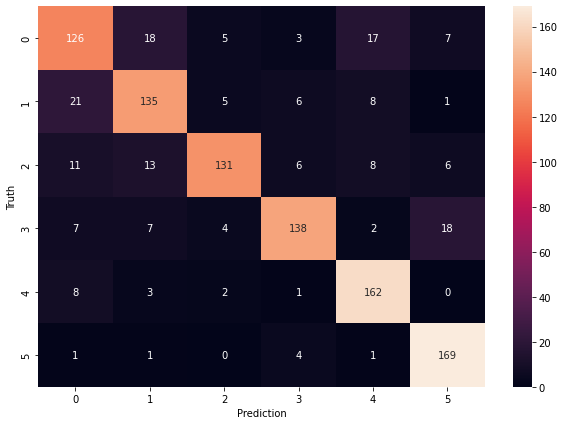

In [31]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

**Conclusion:**
As part of this exercise we have trained the data with algorithms like Multinomial Naive Bayes and Random Forest which are most used and provide good results for text related problems.

As Machine learning algorithms do not work on text data directly, we need to convert them into numeric vectors and feed that into models while training. For this purpose, we have used Bag of words(unigrams, bigrams, n-grams) and TF-IDF text representation techniques.

Key Findings

As the n_gram range keeps increasing, there's drastic fall of improvement in performance metrics.

There's seen a significant improvement in results before pre-processing and after pre-processing the data.

TF-IDF and Bag of words both performed equally well in performance metrics like Recall and F1-score.

Random Forest performed quite well when compared to Multinomial Naive Bayes.

Machine Learning is like a trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which gives good results and satisfies the requirements like latency, interpretability, etc.